# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df = df.sample(500)

In [7]:
# change age to years
df['age'] = round(df['age']/365.25,2)

In [8]:
# drop id
df.drop('id', axis=1, inplace = True)

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
df.shape

(500, 12)

In [11]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,53.675340,1.330000,163.954000,74.332200,128.236000,99.284000,1.392000,1.230000,0.094000,0.070000,0.832000,0.4800
std,6.613535,0.470684,7.619975,14.465034,18.427573,127.694476,0.709466,0.577726,0.292121,0.255403,0.374241,0.5001
min,39.190000,1.000000,120.000000,41.000000,90.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000
25%,49.807500,1.000000,159.000000,64.750000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0000
50%,54.250000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0000
75%,58.367500,2.000000,169.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.0000
max,64.540000,2.000000,187.000000,148.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.0000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [12]:
# detect if there is a negative value in blood pressures
df[(df.ap_hi < 0) | (df.ap_lo < 0)]
# there is not

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


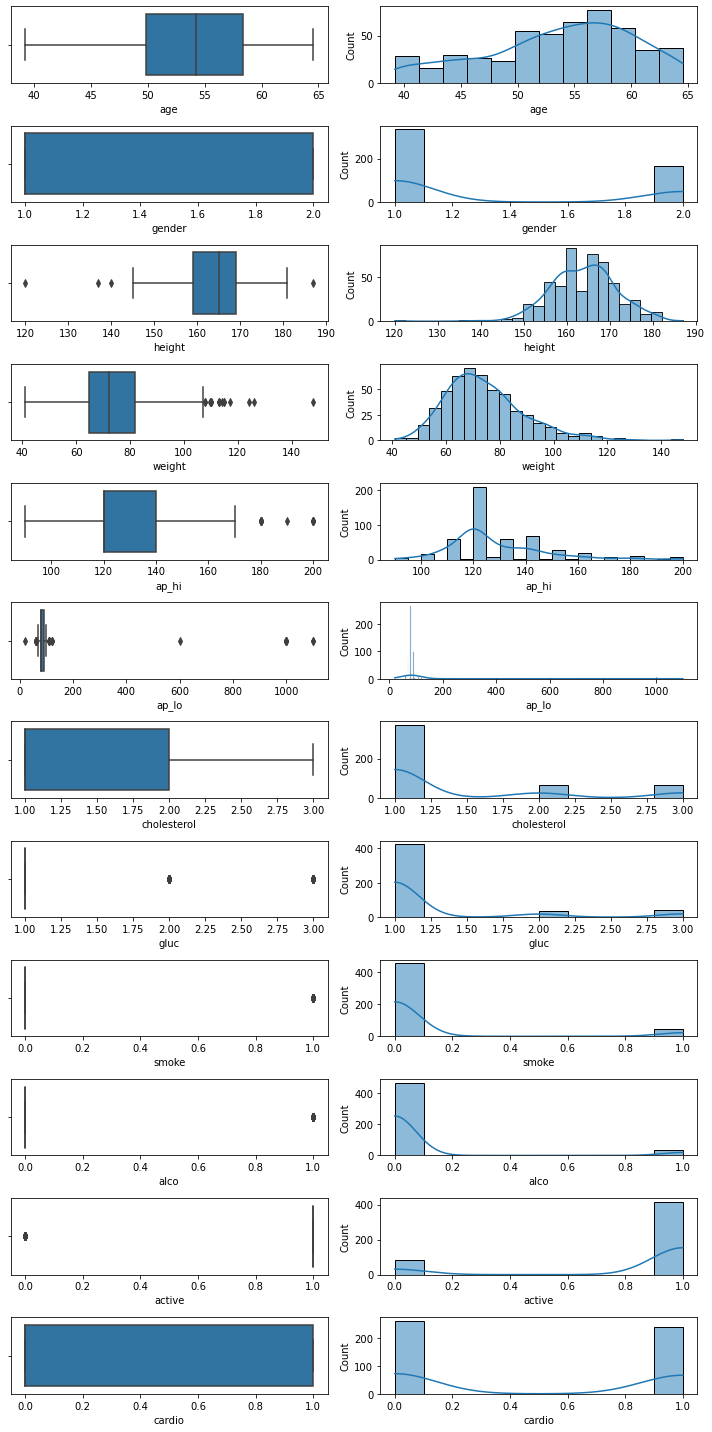

In [13]:
# detecting outliers
plt.figure(figsize=(10,20))
columns = df.select_dtypes('number').columns.values
for count,x in enumerate(columns):
    plt.subplot(len(columns),2,(count +1)*2 - 1)
    sns.boxplot(x=x, data=df)
    plt.subplot(len(columns),2,(count +1)*2)
    sns.histplot(x=x, data=df, kde=True)
plt.tight_layout()

In [14]:
def drop_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_temp = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(col, q1,q3,lower_bound,upper_bound)
    print(df_temp.shape)
    return df_temp

filtered_df = df.copy()
cols = ['height','weight','ap_hi','ap_lo']
for col in cols:
     filtered_df = drop_outliers(filtered_df, col)
filtered_df

height 159.0 169.0 144.0 184.0
(496, 12)
weight 65.0 82.0 39.5 107.5
(480, 12)
ap_hi 120.0 140.0 90.0 170.0
(463, 12)
ap_lo 80.0 86.5 70.25 96.25
(352, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14313,51.73,2,168,68.0,120,80,1,1,0,0,0,0
5137,43.57,1,160,80.0,130,90,3,1,1,1,1,0
6507,60.01,2,173,77.0,120,80,1,1,0,0,1,0
41733,43.81,1,165,95.0,130,90,1,1,0,0,1,0
56304,62.54,1,170,76.0,125,90,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
637,49.85,1,165,55.0,100,80,1,1,0,0,1,0
22228,51.18,1,170,65.0,120,80,1,1,0,0,0,0
68289,57.73,1,167,88.0,120,80,1,1,0,0,1,0
53685,51.56,1,154,85.0,150,90,1,1,0,0,1,1


In [15]:
df = filtered_df

## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

In [16]:
df[df.age < 18]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


⭐What is the mean for Systolic blood pressure?

In [17]:
xbar = df.ap_hi.mean()
xbar

127.48579545454545

⭐What is the standard deviation for Systolic blood pressure?

In [18]:
s = df.ap_hi.std()
s

12.083744935786328

⭐What is the standard error of the mean for Systolic blood pressure?

In [19]:
sem = df.ap_hi.sem()
# sem = (s/np.sqrt(df.shape[0]))
sem

0.6440657691420312

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [20]:
df.ap_hi.describe()

count    352.000000
mean     127.485795
std       12.083745
min      100.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      170.000000
Name: ap_hi, dtype: float64

In [21]:
t_test = (xbar - 122)/(s/np.sqrt(df.shape[0]))
t_test

8.517446070535865

In [22]:
oneSamp = stats.ttest_1samp(df.ap_hi, 122, alternative='greater')
oneSamp

Ttest_1sampResult(statistic=8.517446070535867, pvalue=2.429477597965902e-16)

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [23]:
stats.t.interval(alpha = 0.90, df=df.shape[0]-1, loc=xbar, scale=sem)

(126.42359806613116, 128.54799284295973)

In [24]:
stats.t.interval(alpha = 0.95, df=df.shape[0]-1, loc=xbar, scale=sem)

(126.21908196212712, 128.7525089469638)

In [25]:
stats.t.interval(alpha = 0.99, df=df.shape[0]-1, loc=xbar, scale=sem)

(125.81772401006485, 129.15386689902607)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [26]:
# H0: mu = 122
# H1: mu > 122
oneSamp = stats.ttest_1samp(df.ap_hi, 122, alternative='greater')
oneSamp

Ttest_1sampResult(statistic=8.517446070535867, pvalue=2.429477597965902e-16)

In [27]:
# Compare p-value and alpha
null_hypothesis = 'Systolic blood pressure Normal value : 122 mm Hg for all adults aged 18 and over'
alternative_hypothesis = 'Systolic blood pressure Normal value is greater than 122 mm Hg for all adults aged 18 and over'
alpha = 0.05
p_value = oneSamp.pvalue
if p_value < alpha:
    print(f"The p-value of {p_value:.4f} is less than {alpha}, so we can reject the null hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"The p-value of {p_value:.4f} is not less than {alpha}, so we cannot reject the null hypothesis and must conclude that {null_hypothesis}.")

The p-value of 0.0000 is less than 0.05, so we can reject the null hypothesis and conclude that Systolic blood pressure Normal value is greater than 122 mm Hg for all adults aged 18 and over.


## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [28]:
df.groupby('gender').ap_hi.mean()

gender
1    127.277056
2    127.884298
Name: ap_hi, dtype: float64

___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [29]:
males = df[df.gender == 1]
females = df[df.gender == 2]

In [30]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(males.ap_hi, females.ap_hi)
leveneTest
null_hypothesis = 'H0: "the population variances of group 1 and 2 are equal"'
alternative_hypothesis = 'H1: "the population variances of group 1 and 2 are not equal"'
alpha = 0.05
p_value = leveneTest.pvalue
if p_value < alpha:
    print(f"The p-value of {p_value:.4f} is less than {alpha}, so we can reject the null hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"The p-value of {p_value:.4f} is not less than {alpha}, so we cannot reject the null hypothesis and must conclude that {null_hypothesis}.")

The p-value of 0.8180 is not less than 0.05, so we cannot reject the null hypothesis and must conclude that H0: "the population variances of group 1 and 2 are equal".


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [31]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(males.ap_hi, females.ap_hi, equal_var = False)
indTest

Ttest_indResult(statistic=-0.45661067521417553, pvalue=0.6483348225373683)

In [32]:
null_hypothesis = 'H0: µ1 = µ2 ("the two population means are equal") There is no Significant Difference Between Males and Females in Systolic Blood Pressure?'
alternative_hypothesis = 'H1: µ1 ≠ µ2 ("the two population means are not equal") There is a Significant Difference Between Males and Females in Systolic Blood Pressure?'
alpha = 0.05
p_value = indTest.pvalue
if p_value < alpha:
    print(f"The p-value of {p_value:.4f} is less than {alpha}, so we can reject the null hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"The p-value of {p_value:.4f} is not less than {alpha}, so we cannot reject the null hypothesis and must conclude that {null_hypothesis}.")

The p-value of 0.6483 is not less than 0.05, so we cannot reject the null hypothesis and must conclude that H0: µ1 = µ2 ("the two population means are equal") There is no Significant Difference Between Males and Females in Systolic Blood Pressure?.


## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

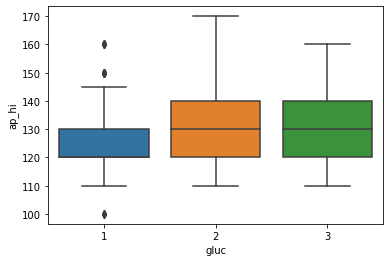

In [33]:
sns.boxplot(y='ap_hi', x = 'gluc', data=df)

⭐Show the descriptive statistics of 3 groups.

In [34]:
df.groupby('gluc').ap_hi.describe().T

gluc,1,2,3
count,300.000000,25.000000,27.000000
mean,126.730000,134.040000,129.814815
std,11.534901,15.881016,12.440743
min,100.000000,110.000000,110.000000
25%,120.000000,120.000000,120.000000
50%,120.000000,130.000000,130.000000
75%,130.000000,140.000000,140.000000
max,160.000000,170.000000,160.000000


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [35]:
df.gluc.unique()

array([1, 2, 3], dtype=int64)

In [36]:
from scipy.stats import f_oneway
anova_test = f_oneway((df.ap_hi[df.gluc==1]), (df.ap_hi[df.gluc==2]),
         (df.ap_hi[df.gluc==3]))
anova_test

F_onewayResult(statistic=4.8708819980487625, pvalue=0.0081957479658881)

In [37]:
null_hypothesis = 'H0: there is no significant difference between the mean of the groups'
alternative_hypothesis = 'H1: there is a significant difference between the mean of the groups'
alpha = 0.05
p_value = anova_test.pvalue
if p_value < alpha:
    print(f"The p-value of {p_value:.4f} is less than {alpha}, so we can reject the null hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"The p-value of {p_value:.4f} is not less than {alpha}, so we cannot reject the null hypothesis and must conclude that {null_hypothesis}.")

The p-value of 0.0082 is less than 0.05, so we can reject the null hypothesis and conclude that H1: there is a significant difference between the mean of the groups.


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [38]:
contingency_table = pd.crosstab(df['active'], df['cardio'])
print(contingency_table)

cardio    0    1
active          
0        34   28
1       156  134


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [39]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [40]:
# Print the test statistic and p-value
print(f"chi2 = {chi2:.3f}, p = {p:.3f}")

chi2 = 0.000, p = 0.992


In [41]:
null_hypothesis = 'H0: There is no significant Relationship Between Physical activity vs. Presence or absence of cardiovascular disease'
alternative_hypothesis = 'H1: There is a significant Relationship Between Physical activity vs. Presence or absence of cardiovascular disease'
alpha = 0.05
p_value = p
if p_value < alpha:
    print(f"The p-value of {p_value:.4f} is less than {alpha}, so we can reject the null hypothesis and conclude that {alternative_hypothesis}.")
else:
    print(f"The p-value of {p_value:.4f} is not less than {alpha}, so we cannot reject the null hypothesis and must conclude that {null_hypothesis}.")

The p-value of 0.9924 is not less than 0.05, so we cannot reject the null hypothesis and must conclude that H0: There is no significant Relationship Between Physical activity vs. Presence or absence of cardiovascular disease.
